<a href="https://colab.research.google.com/github/Vinny424/AssetsNexus/blob/main/DogClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports


In [ ]:
# Import necessary libraries

import numpy as np  # Import the numpy library, which is used for working with arrays of data
import pandas as pd  # Import the pandas library, which is used for data manipulation and analysis
import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib, which is used for creating static, animated, and interactive visualizations in Python
import os  # Import the os module, which provides functions for interacting with the operating system


from tqdm import tqdm  # tqdm is used for displaying progress bars
from keras.preprocessing import image  # Import the image module from keras for image preprocessing
from sklearn.preprocessing import label_binarize  # Import the label_binarize function to convert labels to a binary format
from sklearn.model_selection import train_test_split  # Import the train_test_split function to split the dataset into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # Import the RandomForestClassifier for creating a Random Forest model
from sklearn.svm import SVC  # Import the SVC (Support Vector Classifier) for creating a Support Vector Machine model
from sklearn.neighbors import KNeighborsClassifier  # Import the KNeighborsClassifier for creating a K-Nearest Neighbors model
from sklearn.metrics import accuracy_score, f1_score  # Import the accuracy_score and f1_score functions to evaluate the performance of the models


from google.colab import drive  # Importing Google Drive to mount it
drive.mount('/content/drive')  # Mount Google Drive to access files



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Load labels data

In [ ]:
# Load labels data from a CSV file
labels_all = pd.read_csv("/content/drive/MyDrive/Dog Classification/labels.csv")
print(labels_all.shape)  # Print the shape of the loaded data
labels_all.head()  # Display the first few rows of the loaded data


(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


##Define list of class names for filtering


In [ ]:
# Define a list of class names for filtering
CLASS_NAMES = ['scottish_deerhound', 'maltese_dog', 'bernese_mountain_dog',]

# Filter the labels based on the specified class names
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()  # Reset index after filtering
labels.head()  # Display the first few rows of the filtered data


,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


##Creating numpy matrix to hold labels


In [ ]:
# Create an empty numpy matrix to store image data
X_data = np.zeros((len(labels), 224 * 224 * 3), dtype='float32')

# Perform one-hot encoding on the breed labels
Y_data = label_binarize(labels['breed'], classes=CLASS_NAMES)


##Decine folder path and convert image+ Normalize dataset


In [ ]:
# Specify the folder path where images are stored
folder_path = '/content/drive/MyDrive/Dog Classification/train'

# Read and convert each image to a numpy array, and normalize the dataset
for i in tqdm(range(len(labels))):  # tqdm adds a progress bar
    img = image.load_img(os.path.join(folder_path, '%s.jpg' % labels['id'][i]), target_size=(224, 224))
    img = image.img_to_array(img)
    X_data[i] = img.flatten() / 255.0  # Flatten the image and normalize pixel values


100%|██████████| 357/357 [00:01<00:00, 207.29it/s]


##print train image shapes


In [ ]:
# Print shapes and sizes of the training images and one-hot encoded labels
print('\nTrain Images shape: ', X_data.shape, ' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ', Y_data.shape, ' size: {:,}'.format(Y_data.size))



Train Images shape:  (357, 150528)  size: 53,738,496
One-hot encoded output shape:  (357, 3)  size: 1,071


###Split dataset


In [ ]:
# Split the dataset into training, validation, and test sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size=0.1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size=0.2)


###Train each model

In [ ]:
# Train Random Forest, SVM, and K-Nearest Neighbors models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, np.argmax(Y_train, axis=1))

svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, np.argmax(Y_train, axis=1))

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, np.argmax(Y_train, axis=1))


KNeighborsClassifier(n_neighbors=3)

##Create a list for each model

In [ ]:
# Create a list of models and their corresponding names
models = [rf_model, svm_model, knn_model]
model_names = ['Random Forest', 'SVM', 'KNN']


##Evaluate each model

In [ ]:
# Evaluate models and print accuracy and F1 score
for model, name in zip(models, model_names):
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(np.argmax(Y_test, axis=1), Y_pred)
    f1 = f1_score(np.argmax(Y_test, axis=1), Y_pred, average='weighted')

    print(f"{name} - Accuracy on the test set: {accuracy * 100:.2f}%, F1 Score: {f1:.2f}")


Random Forest - Accuracy on the test set: 63.89%, F1 Score: 0.62
SVM - Accuracy on the test set: 44.44%, F1 Score: 0.43
KNN - Accuracy on the test set: 33.33%, F1 Score: 0.26


###BAR CHART COMPARISON


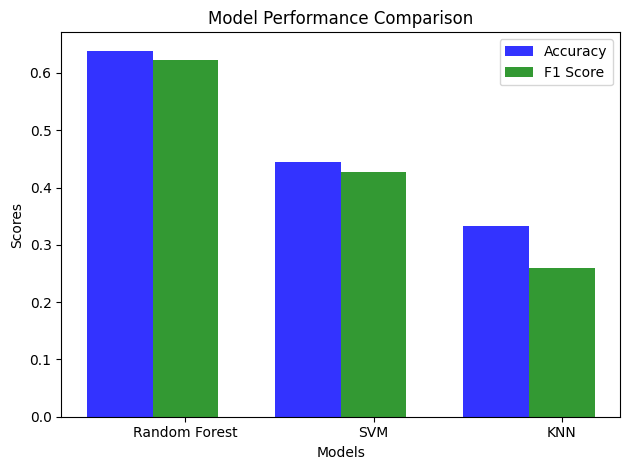

In [ ]:
# Create a bar chart comparing accuracy and F1 score for each model
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8
index = np.arange(len(model_names))

accuracy_scores = [accuracy_score(np.argmax(Y_test, axis=1), model.predict(X_test)) for model in models]
f1_scores = [f1_score(np.argmax(Y_test, axis=1), model.predict(X_test), average='weighted') for model in models]

rects1 = plt.bar(index, accuracy_scores, bar_width, alpha=opacity, color='b', label='Accuracy')
rects2 = plt.bar(index + bar_width, f1_scores, bar_width, alpha=opacity, color='g', label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width, model_names)
plt.legend()

plt.tight_layout()
plt.show()


###CONFUSION MATRICES


Random Forest - Accuracy on the test set: 63.89%, F1 Score: 0.62


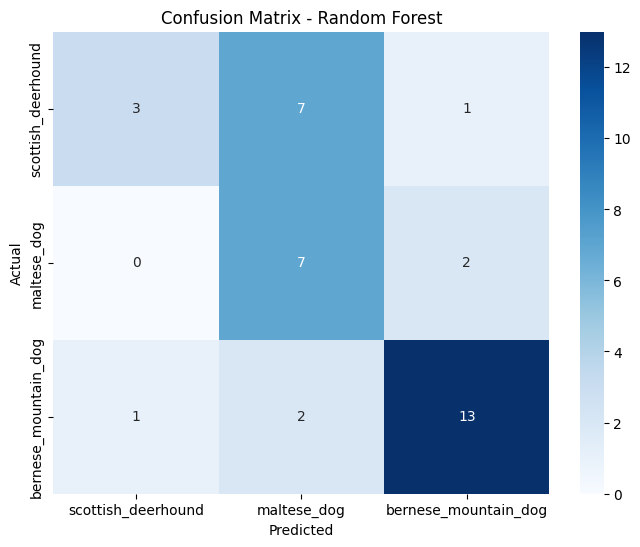

SVM - Accuracy on the test set: 44.44%, F1 Score: 0.43


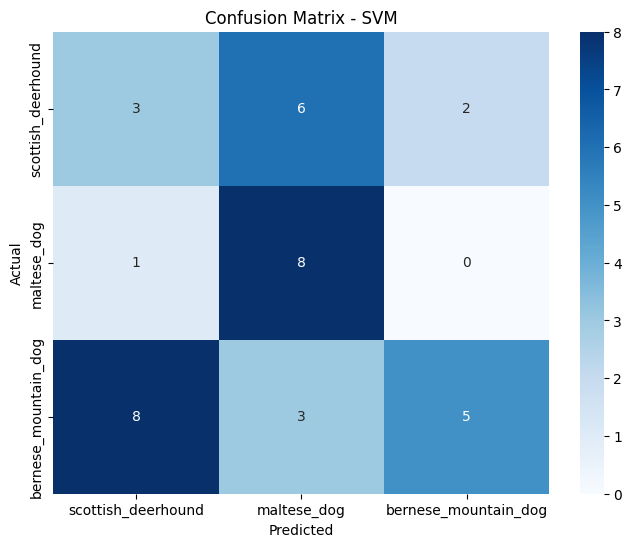

KNN - Accuracy on the test set: 33.33%, F1 Score: 0.26


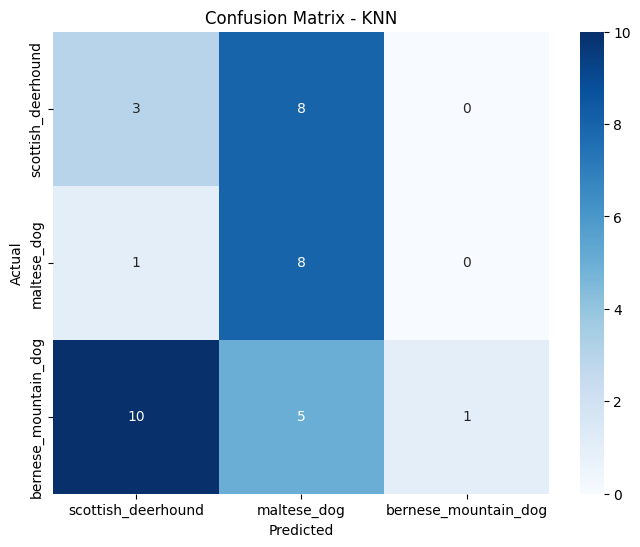

In [ ]:
# Evaluate models and print accuracy, F1 score, and create confusion matrices
for model, name in zip(models, model_names):
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(np.argmax(Y_test, axis=1), Y_pred)
    f1 = f1_score(np.argmax(Y_test, axis=1), Y_pred, average='weighted')

    print(f"{name} - Accuracy on the test set: {accuracy * 100:.2f}%, F1 Score: {f1:.2f}")

    # Create confusion matrix
    conf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



In [ ]:
# Save the trained Random Forest model to a file
import joblib
joblib.dump(rf_model, '/content/drive/MyDrive/Dog Classification/random_forest_model.pkl')


['/content/drive/MyDrive/Dog Classification/random_forest_model.pkl']

We used Joblib because it produces smaller models at the cost of slower loading times.
